In [1]:
import os
import numpy as np
from nanowire.optics.simulate import Simulator
from nanowire.optics.postprocess import Simulation
from nanowire.optics.utils.utils import setup_sim
from nanowire.optics.utils.config import Config
import scipy.constants as consts
import scipy.integrate as intg
import IPython.display as disp
import matplotlib.pyplot as plt
import time
%load_ext autoreload 
%autoreload 2

In [2]:
def integrate(arr, xvals, yvals):
    x_integral = intg.trapz(arr, x=xvals, axis=0)
    y_integral = intg.trapz(x_integral, x=yvals, axis=0)
    return y_integral

In [8]:
conf = Config('InPlaneSampleTest.yml')
sim = Simulator(conf)
sim.setup()

['Layers', 'NW_AlShell', 'params', 'shell_radius']
['Layers', 'NW_AlShell', 'params', 'core_radius']
['Layers', 'NW_AlShell', 'params', 'thickness']
['Layers', 'ITO', 'params', 'thickness']
['Layers', 'Substrate', 'params', 'thickness']
['Layers', 'Air', 'params', 'thickness']
['Simulation', 'params', 'array_period']


In [9]:
ITO_locs = np.linspace(.5, .8, 4, endpoint=False)
NW_locs = np.linspace(.8, .8+1.3, 10, endpoint=False)
Sub_locs = np.linspace(.8+1.3, .8+1.3+1, 4, endpoint=False)
#z_vals = np.concatenate((ITO_locs, NW_locs, Sub_locs))
z_vals = NW_locs

In [11]:
num_points = np.arange(25, 275, 25)
results = np.zeros((num_points.shape[0], z_vals.shape[0]))
time_per_plane = np.zeros(num_points.shape[0])
for i, pts in enumerate(num_points):
    #print('#'*25)
    #print('Computing with {} points per edge'.format(pts))
    times = np.zeros(z_vals.shape[0])
    for j, z in enumerate(z_vals):
        #print('Computing at z = {:.2f}'.format(z))
        xvals = np.linspace(0, sim.period, pts)
        start = time.time()
        Ex, Ey, Ez, Hx, Hy, Hz = sim.compute_fields_on_plane(z, pts, pts)
        end = time.time()
        diff = end - start
        #print('Time to compute: {:.2f} seconds'.format(diff))
        normEsq = np.absolute(Ex)**2 + np.absolute(Ey)**2 + np.absolute(Ez)**2
        #print(normE.shape)
        res = integrate(normEsq, xvals, xvals)
        #print('Result: {:.6f}'.format(res))
        results[i, j] = res
        #if j == 1:
        #    plt.figure()
        #    plt.imshow(normE)
        #    plt.show()
        #    input('Continue?')
    avg_time = np.average(times)
    #print('Avg Time: {}'.format(avg_time))
    time_per_plane[i] = avg_time 
print('Done!')

Done!


In [12]:
print(results[:, 0])

[ 42.139  42.139  42.139  42.139  42.139  42.139  42.139  42.139  42.139
  42.139]


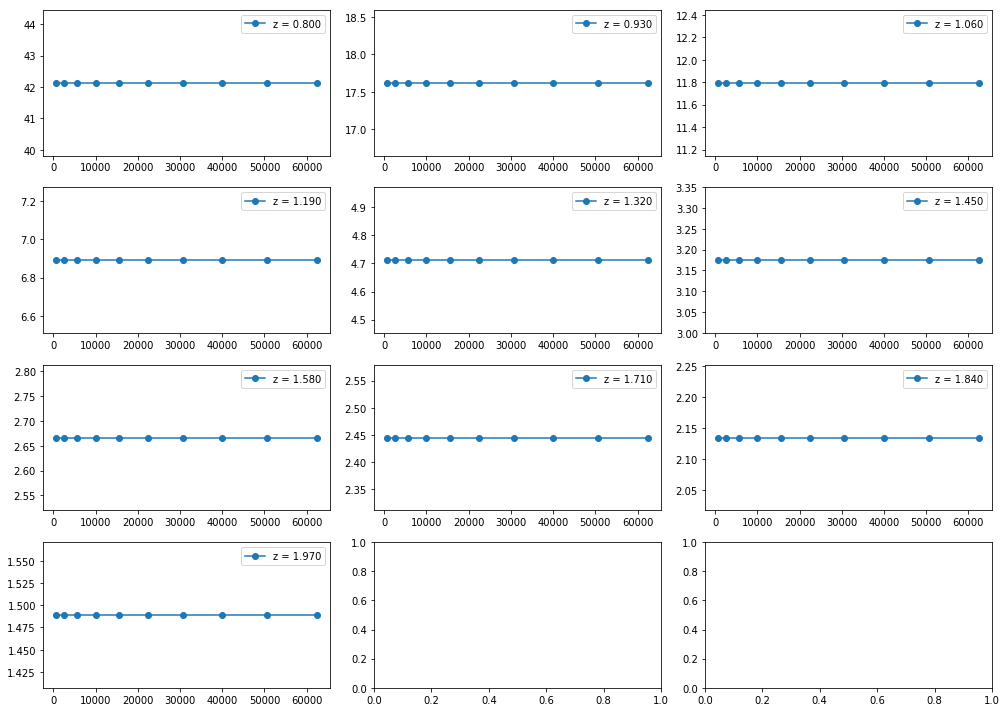

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(14, 10))
axes = axes.flatten()
for i, z in enumerate(z_vals):
    axes[i].plot(num_points**2, results[:, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
plt.tight_layout()
plt.show()